In [19]:
import sys
sys.path.append("../../")

import os
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",})

# Import pyACC logger
from pyACC.helpers import Logger

# Set the logger
print = Logger("pyACC.CosmologicalDistances")

# Import integration class
from pyACC.cosmology import CosmologicalDistances

# Import pandas
import pandas as pd

# Compute cosmological distances

In this exercise you will keep practicing integration in a cosmological context.
In particular you will compute cosmological distances.

The basis to compute distances is the Hubble function $H(z)$, which describes the evolution of the backgroud.

for flat $\Lambda$ CDM cosmology it reads:

$$ D_c(z) = \int_0^z \frac{\mathrm{d} z' c}{H(z')} $$

Implement this function, or try your favourite cosmological model!

In [4]:
# Implement your favourite Hubble function
def hubble_function(z, Omega_M, H0):
    """
    Compute the Hubble function at redshift z for LambdaCDM cosmology.

    Parameters
    ----------
    z : float
        Redshift.
    Omega_M : float
        Matter density parameter.
    H0 : float
        Hubble constant.
    
    Returns
    -------
    float
        Hubble function at redshift z.
    """
    
    return H0 * np.sqrt(Omega_M * (1+z)**3 + (1-Omega_M))

In [5]:
# Now use the function you've implemented to compute cosmological distances
# Use the class you've implemented

Omega_M = 0.3
H0 = 70

# Create an instance of the class
get_distances = CosmologicalDistances(hubble_function, Omega_M, H0)

In [6]:
get_distances.cosmo_pars

(0.3, 70)

In [10]:
# Comoving distance at z=1
print(get_distances.comoving_distance(1), "Mpc")

2024-03-14 10:53:26.557848 :: pyACC.CosmologicalDistances  :: 3303.8288058874678 Mpc


In [11]:
# array of redshifts
z_list = np.linspace(0.0001, 2.5, 100)

# Calculate the comoving distance at each redshift in z_list
comoving_distance = [get_distances.comoving_distance(z) for z in z_list]

# Calculate the angular diameter distance at each redshift in z_list
angular_diameter_distance = [get_distances.angular_diameter_distance(z) for z in z_list]

# Calculate the luminosity distance at each redshift in z_list
luminosity_distance = [get_distances.luminosity_distance(z) for z in z_list ]

# Calculate the distance modulus at each redshift in z_list
distance_modulus = [get_distances.distance_modulus(z) for z in z_list]  

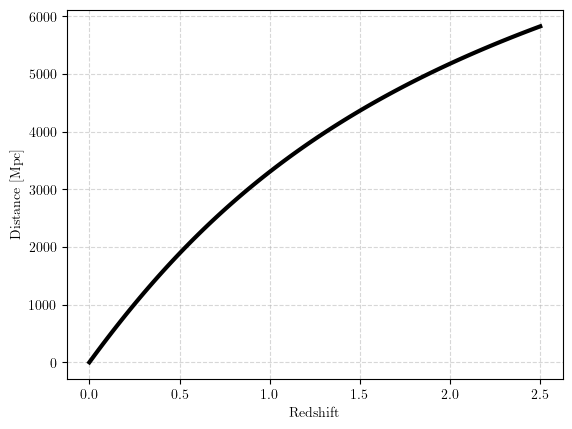

In [13]:
plt.plot(z_list, comoving_distance, lw=3, color="k", label="Comoving distance")

plt.grid(True, ls="--", alpha=0.5)
plt.xlabel("Redshift")
plt.ylabel("Distance [Mpc]");

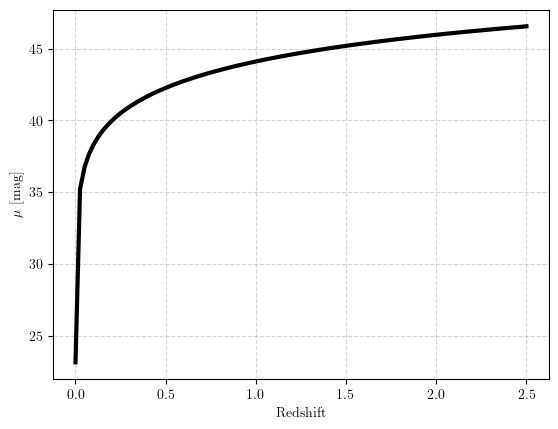

In [14]:
plt.plot(z_list, distance_modulus, lw=3, color="k", label="Distance modulus")

plt.grid(True, ls="--", alpha=0.5)
plt.xlabel("Redshift")
plt.ylabel("$\mu$ [mag]");

## Compare against experimental data


Let's plot the SNIa distance moduli from Pantheon+ analysis against your favourite cosmological model.

Check out the [paper](https://arxiv.org/abs/2112.03863). 
Data are stored [here](https://github.com/PantheonPlusSH0ES/PantheonPlusSH0ES.github.io).
Try to understand which table you should use for the plot.

In [24]:
# Read the data from Pantheon+ set. 
if not os.path.exists("Pantheon+SH0ES.dat"):
    !wget https://raw.githubusercontent.com/PantheonPlusSH0ES/DataRelease/main/Pantheon%2B_Data/4_DISTANCES_AND_COVAR/Pantheon%2BSH0ES.dat

# Suggestion #1: pandas
df = pd.read_csv("Pantheon+SH0ES.dat", sep=" ", header=0)

# Suggestion #2: read the documentation to understand which column you should pick
zColumn = "zHD"
muColumn = "MU_SH0ES"
muErrColumn = "MU_SH0ES_ERR_DIAG"

Text(0, 0.5, '$\\mu$ [mag]')

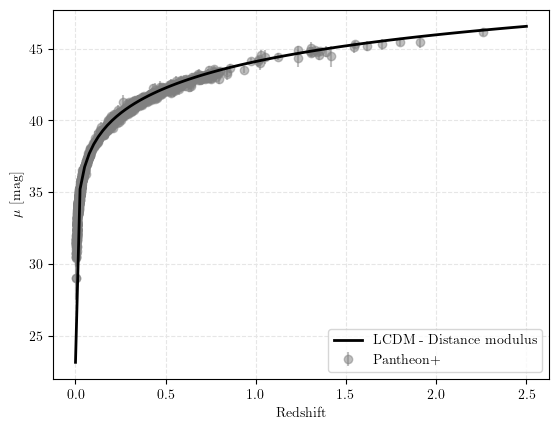

In [25]:
plt.plot(z_list, distance_modulus, lw=2, color="k", label="LCDM - Distance modulus", zorder=1000)
plt.errorbar(df[zColumn],
             df[muColumn], 
             df[muErrColumn], fmt="o", color="0.5", alpha=0.5, label="Pantheon+")

plt.grid(True, color="0.9", ls="--")
plt.legend(loc="lower right")
plt.xlabel("Redshift")
plt.ylabel("$\mu$ [mag]")